<a href="https://colab.research.google.com/github/dingyida/reinforce-learning/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [ ]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -595
Episode 2: total reward = -793
Episode 3: total reward = -694
Episode 4: total reward = -991
Episode 5: total reward = -1288


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [ ]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))



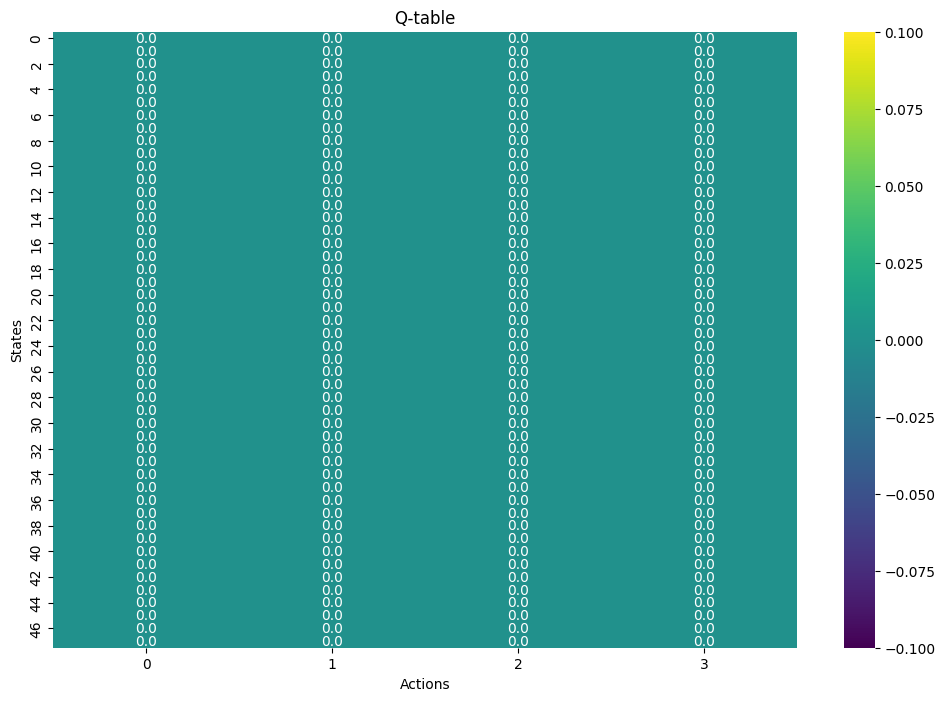

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

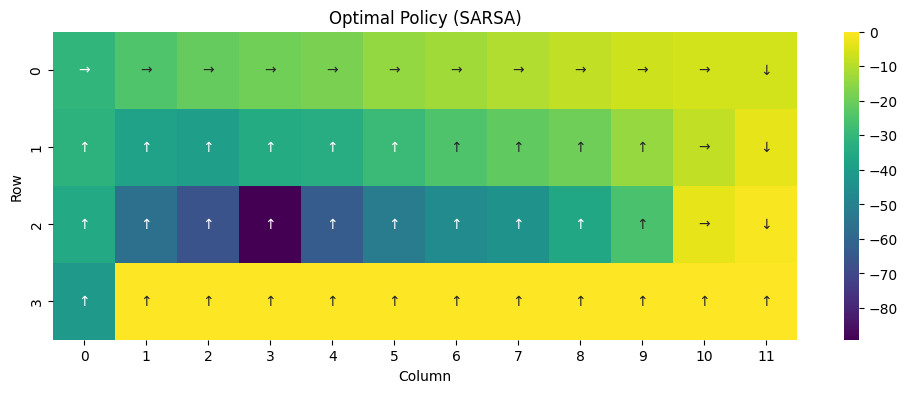

In [ ]:

# ---- ADDED: small helper for ε-greedy ----
def epsilon_greedy(q_row, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_row))
    return int(np.argmax(q_row))

# ---- ADDED: tiny SARSA training loop (on-policy TD control) ----
epsilon_start, epsilon_end = 1.0, 0.05
for ep in range(n_episodes):
    # linear ε decay
    epsilon = epsilon_end + (epsilon_start - epsilon_end) * (1 - ep / max(1, n_episodes - 1))
    s, _ = env.reset()
    a = epsilon_greedy(Q[s], epsilon)

    for _ in range(max_steps):
        s_next, r, terminated, truncated, _ = env.step(a)
        done = terminated or truncated

        # choose next action on-policy (SARSA)
        a_next = epsilon_greedy(Q[s_next], epsilon) if not done else 0

        # SARSA update (target = r + γ Q[s',a'])
        td_target = r + (0 if done else discount_factor * Q[s_next, a_next])
        Q[s, a] += learning_rate * (td_target - Q[s, a])

        s, a = s_next, a_next
        if done:
            break







def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()
plot_policy(Q)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

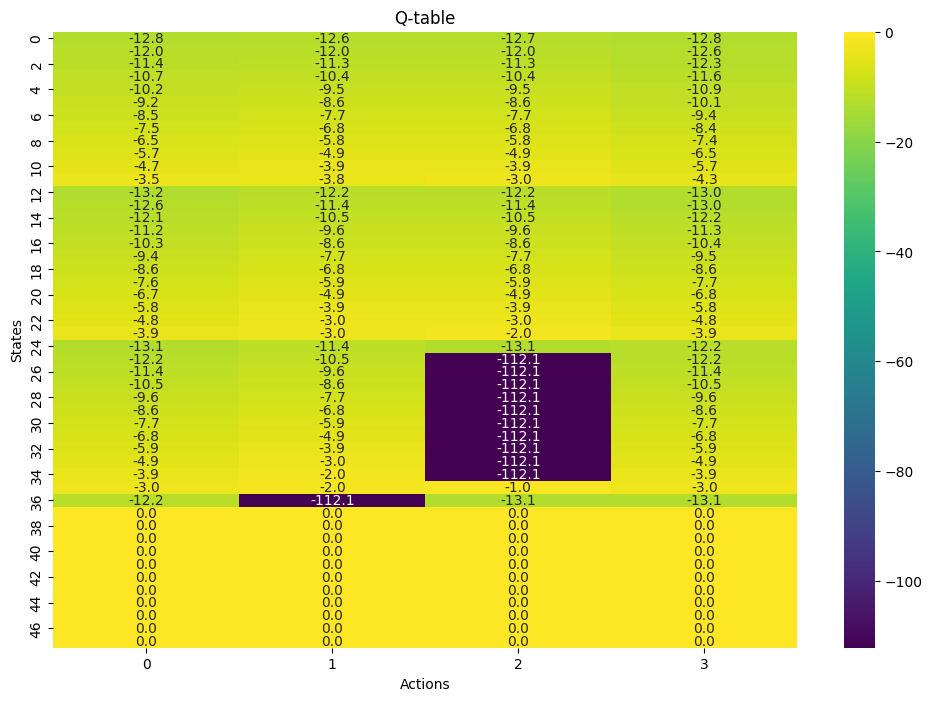

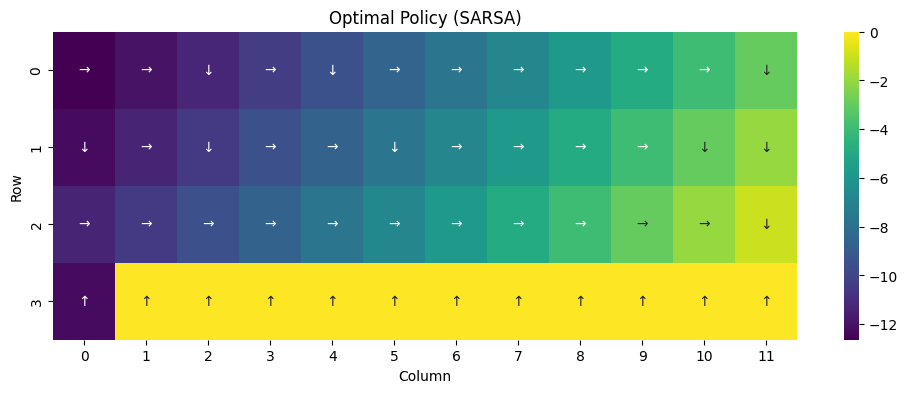

In [ ]:
import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100        # safety cap

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

# ---- ADDED: small helper for ε-greedy ----
def epsilon_greedy(q_row, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_row))
    return int(np.argmax(q_row))

# ---- ADDED: tiny SARSA training loop (on-policy TD control) ----
epsilon_start, epsilon_end = 1.0, 0.05
for ep in range(n_episodes):
    # linear ε decay
    epsilon = epsilon_end + (epsilon_start - epsilon_end) * (1 - ep / max(1, n_episodes - 1))
    s, _ = env.reset()
    a = epsilon_greedy(Q[s], epsilon)

    for _ in range(max_steps):
        s_next, r, terminated, truncated, _ = env.step(a)
        done = terminated or truncated

        # choose next action on-policy (SARSA)
        a_next = epsilon_greedy(Q[s_next], epsilon) if not done else 0



        # Q-learning update (target = r + γ max_a Q[s',a])
        td_target = r + (0 if done else discount_factor * np.max(Q[s_next]))

        Q[s, a] += learning_rate * (td_target - Q[s, a])

        s, a = s_next, a_next
        if done:
            break

# ----------------- plotting -----------------
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
    plt.figure(figsize=(12, 8))
    sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
    plt.xlabel("Actions")
    plt.ylabel("States")
    plt.title("Q-table")
    plt.show()

plot_Q(Q)

def plot_policy(Q, title="SARSA"):
    # Reshape Q table to a 4x12 grid
    Q_grid = Q.reshape((4, 12, n_actions))

    # Get the optimal action for each state and its corresponding Q-value
    optimal_action = np.argmax(Q_grid, axis=2)
    optimal_policy_Q = np.max(Q_grid, axis=2)

    # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
    action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
    optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)

    plt.figure(figsize=(12, 4))
    sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True)
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.title(f"Optimal Policy ({title})")
    plt.show()

plot_policy(Q, title="SARSA")


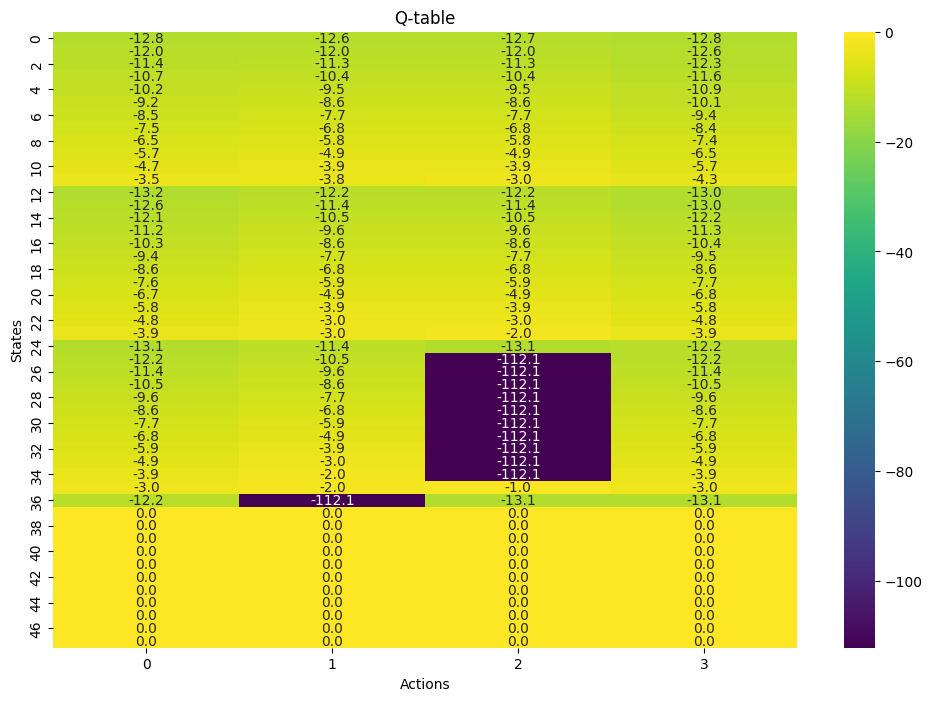

In [ ]:
plot_Q(Q)

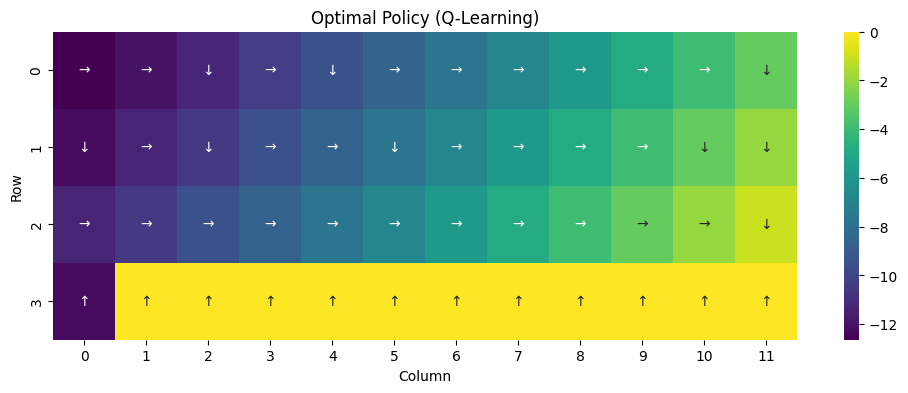

In [ ]:
plot_policy(Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


Q-learning is better in both is_slippery=True or is_slippery=false if we freeze eps; if we use greedy algorithm with not zero eps, sarsa preform better when we use CliffWalking(is_slippery=False).   

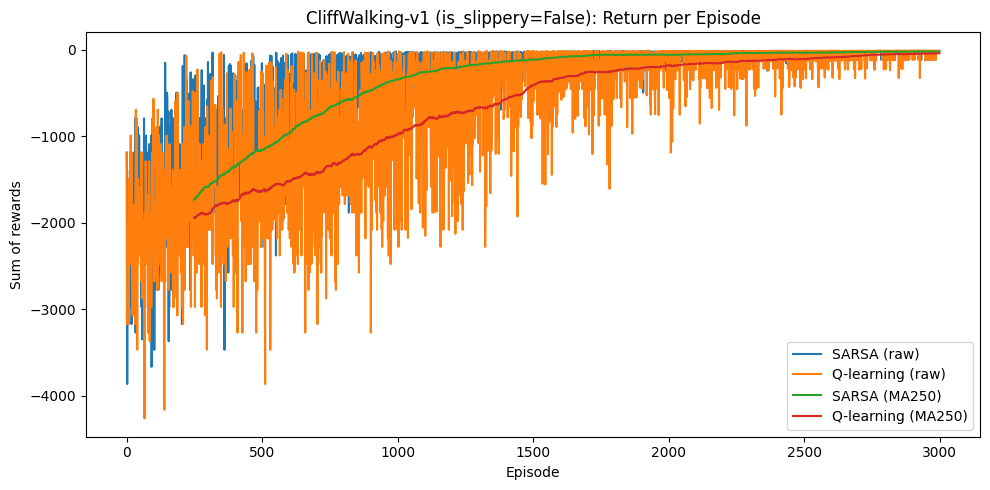


=== Greedy Policy: SARSA (is_slippery=False) ===
> > > > > > > > > > > v
^ ^ ^ ^ ^ ^ ^ ^ ^ > > v
^ ^ ^ ^ ^ ^ ^ ^ ^ ^ > v
S C C C C C C C C C C G

=== Greedy Policy: Q-learning (is_slippery=False) ===
> > > > > > > > > > > v
> > > > > > > > > > > v
> > > > > > > > > > > v
S C C C C C C C C C C G


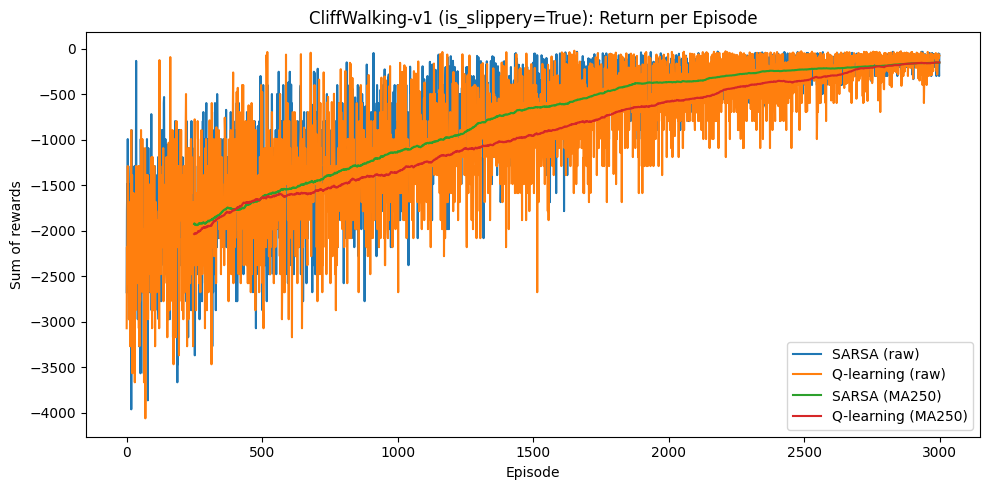


=== Greedy Policy: SARSA (is_slippery=True) ===
^ ^ ^ ^ ^ ^ ^ ^ > ^ > >
^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ >
^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ >
S C C C C C C C C C C G

=== Greedy Policy: Q-learning (is_slippery=True) ===
> > > > > > > > > > > >
^ > > > > > > ^ > ^ > <
^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ >
S C C C C C C C C C C G

=== Mean Return over Last 200 Training Episodes ===
CliffWalking(is_slippery=False) - SARSA     : -22.95
CliffWalking(is_slippery=False) - Q-learning: -40.175
CliffWalking(is_slippery=True)  - SARSA     : -148.035
CliffWalking(is_slippery=True)  - Q-learning: -141.42

=== Greedy Evaluation (ε=0) over 200 Episodes ===
CliffWalking(is_slippery=False) - SARSA     : -17.0  | falls: 0  | goals: 200  | timeouts: 0  | avg_steps: 17.0
CliffWalking(is_slippery=False) - Q-learning: -13.0  | falls: 0  | goals: 200  | timeouts: 0  | avg_steps: 13.0
CliffWalking(is_slippery=True)  - SARSA     : -132.36  | falls: 0  | goals: 154  | timeouts: 46  | avg_steps: 132.36
CliffWalking(is_slippery=True)  - Q-learning

In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# ------------------- Config -------------------
SEED = 42
np.random.seed(SEED)

# Training hyperparameters
N_EPISODES  = 3000
MAX_STEPS   = 200
ALPHA       = 0.1
GAMMA       = 0.99
EPS_START   = 1.0
EPS_END     = 0.05
MA_WINDOW   = 250  # moving average window for smoothing
TAIL_MEAN_N = 200  # how many last episodes to average in the printout

# Evaluation hyperparameters
EVAL_EPISODES = 200  # greedy episodes with ε=0

# CliffWalking canonical grid (Gymnasium CliffWalking-v1)
NROW, NCOL = 4, 12
START_STATE = (NROW - 1) * NCOL + 0        # bottom-left = (3,0) -> 36
GOAL_STATE  = (NROW - 1) * NCOL + (NCOL-1) # bottom-right = (3,11) -> 47
CLIFF_STATES = list(range(START_STATE + 1, GOAL_STATE))  # 37..46

# ------------------- Utils -------------------
def epsilon_greedy(q_row, epsilon: float) -> int:
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_row))
    return int(np.argmax(q_row))

def greedy_action(q_row) -> int:
    return int(np.argmax(q_row))

def moving_average(x, k=25):
    if k <= 1:
        return np.asarray(x, dtype=float)
    y = np.convolve(x, np.ones(k)/k, mode="valid")
    pad = np.full(k-1, np.nan)
    return np.concatenate([pad, y])

def tail_mean(x, tail=200):
    x = np.array(x, dtype=float)
    return float(np.nanmean(x[-tail:]))

def s_to_rc(s: int, ncol: int = NCOL):
    return divmod(s, ncol)  # (row, col)

def rc_to_s(r: int, c: int, ncol: int = NCOL):
    return r * ncol + c

def print_policy(Q: np.ndarray, title: str, is_slippery: bool):
    """
    Pretty-print greedy policy as a 4x12 grid of arrows with S, G, C.
    Actions: 0=UP(^), 1=RIGHT(>), 2=DOWN(v), 3=LEFT(<)
    """
    arrows = {0: '^', 1: '>', 2: 'v', 3: '<'}
    grid = []
    for r in range(NROW):
        row_syms = []
        for c in range(NCOL):
            s = rc_to_s(r, c)
            if s == START_STATE:
                row_syms.append('S')
            elif s == GOAL_STATE:
                row_syms.append('G')
            elif s in CLIFF_STATES:
                row_syms.append('C')
            else:
                a = int(np.argmax(Q[s]))
                row_syms.append(arrows.get(a, '?'))
        grid.append(' '.join(row_syms))
    slip_tag = " (is_slippery=True)" if is_slippery else " (is_slippery=False)"
    print(f"\n=== Greedy Policy: {title}{slip_tag} ===")
    print('\n'.join(grid))

# ------------------- Control (Training) -------------------
def run_control(env_name: str,
                algo: str = "sarsa",
                n_episodes: int = 1500,
                max_steps: int = 200,
                alpha: float = 0.1,
                gamma: float = 0.99,
                eps_start: float = 1.0,
                eps_end: float = 0.05,
                is_slippery=None,
                seed: int = SEED):
    """
    Train tabular SARSA or Q-learning on a discrete Gymnasium env.
    Returns (returns_per_episode, learned_Q).
    """
    make_kwargs = {}
    if is_slippery is not None:
        make_kwargs["is_slippery"] = is_slippery

    env = gym.make(env_name, **make_kwargs)
    try:
        env.reset(seed=seed)
        env.action_space.seed(seed)
        env.observation_space.seed(seed)
    except Exception:
        pass

    n_actions = env.action_space.n
    n_states  = env.observation_space.n
    Q = np.zeros((n_states, n_actions), dtype=np.float64)

    returns = []

    for ep in range(n_episodes):
        # linear epsilon decay
        epsilon = eps_end + (eps_start - eps_end) * (1 - ep / max(1, n_episodes - 1))
        s, _ = env.reset()
        a = epsilon_greedy(Q[s], epsilon)  # SARSA needs next action; ok for Q as well

        ep_return = 0.0
        for _ in range(max_steps):
            s_next, r, terminated, truncated, _ = env.step(a)
            done = terminated or truncated
            ep_return += r

            if algo == "sarsa":
                if not done:
                    a_next = epsilon_greedy(Q[s_next], epsilon)
                    td_target = r + gamma * Q[s_next, a_next]
                else:
                    td_target = r
            elif algo == "q_learning":
                td_target = r if done else r + gamma * np.max(Q[s_next])
            else:
                env.close()
                raise ValueError(f"Unknown algo: {algo}")

            # TD update
            Q[s, a] += alpha * (td_target - Q[s, a])

            if done:
                break

            s = s_next
            a = a_next if algo == "sarsa" else epsilon_greedy(Q[s_next], epsilon)

        returns.append(ep_return)

    env.close()
    return np.array(returns, dtype=np.float64), Q

# ------------------- Greedy Evaluation (ε=0) -------------------
def evaluate_greedy(env_name: str,
                    Q: np.ndarray,
                    n_episodes: int = 200,
                    max_steps: int = 200,
                    is_slippery=None,
                    seed: int = SEED):
    """
    Evaluate a fixed Q-table with greedy policy (ε=0) for n_episodes.
    Returns (array of episode returns, stats dict).
    stats: {"falls": int, "goals": int, "timeouts": int, "avg_steps": float}
    """
    make_kwargs = {}
    if is_slippery is not None:
        make_kwargs["is_slippery"] = is_slippery

    env = gym.make(env_name, **make_kwargs)
    try:
        env.reset(seed=seed + 999)    # different seed for eval
        env.action_space.seed(seed + 999)
        env.observation_space.seed(seed + 999)
    except Exception:
        pass

    eval_returns = []
    falls = 0
    goals = 0
    timeouts = 0
    total_steps = 0

    for _ in range(n_episodes):
        s, _ = env.reset()
        ep_return = 0.0
        steps = 0
        terminated = False
        truncated = False

        while steps < max_steps:
            a = greedy_action(Q[s])
            s_next, r, terminated, truncated, _ = env.step(a)
            ep_return += r
            steps += 1

            if terminated or truncated:
                # Classify by terminal state (robust across reward variants)
                if s_next in CLIFF_STATES:
                    falls += 1
                elif s_next == GOAL_STATE:
                    goals += 1
                break

            s = s_next

        if not (terminated or truncated):
            timeouts += 1  # hit our max_steps cap

        total_steps += steps
        eval_returns.append(ep_return)

    env.close()
    stats = {
        "falls": falls,
        "goals": goals,
        "timeouts": timeouts,
        "avg_steps": total_steps / max(1, n_episodes)
    }
    return np.array(eval_returns, dtype=np.float64), stats

# ------------------- Experiments -------------------
if __name__ == "__main__":
    ENV = "CliffWalking-v1"

    # --------- EXPERIMENT 1: CliffWalking (is_slippery=False) ----------
    cliff_sarsa, Q_cliff_sarsa = run_control(
        ENV, "sarsa", N_EPISODES, MAX_STEPS, ALPHA, GAMMA, EPS_START, EPS_END, is_slippery=False
    )
    cliff_q, Q_cliff_q = run_control(
        ENV, "q_learning", N_EPISODES, MAX_STEPS, ALPHA, GAMMA, EPS_START, EPS_END, is_slippery=False
    )

    plt.figure(figsize=(10, 5))
    plt.plot(cliff_sarsa, label="SARSA (raw)")
    plt.plot(cliff_q,     label="Q-learning (raw)")
    plt.plot(moving_average(cliff_sarsa, MA_WINDOW), label=f"SARSA (MA{MA_WINDOW})")
    plt.plot(moving_average(cliff_q, MA_WINDOW),     label=f"Q-learning (MA{MA_WINDOW})")
    plt.title("CliffWalking-v1 (is_slippery=False): Return per Episode")
    plt.xlabel("Episode"); plt.ylabel("Sum of rewards"); plt.legend(); plt.tight_layout()
    plt.show()

    # Greedy evaluation after training (ε=0)
    eval_cliff_sarsa, stats_cliff_sarsa = evaluate_greedy(
        ENV, Q_cliff_sarsa, EVAL_EPISODES, MAX_STEPS, is_slippery=False
    )
    eval_cliff_q,     stats_cliff_q = evaluate_greedy(
        ENV, Q_cliff_q,     EVAL_EPISODES, MAX_STEPS, is_slippery=False
    )

    # Print policies
    print_policy(Q_cliff_sarsa, "SARSA", is_slippery=False)
    print_policy(Q_cliff_q,     "Q-learning", is_slippery=False)

    # --------- EXPERIMENT 2: CliffWalking (is_slippery=True) ----------
    cliff_slip_sarsa, Q_cliff_slip_sarsa = run_control(
        ENV, "sarsa", N_EPISODES, MAX_STEPS, ALPHA, GAMMA, EPS_START, EPS_END, is_slippery=True
    )
    cliff_slip_q, Q_cliff_slip_q = run_control(
        ENV, "q_learning", N_EPISODES, MAX_STEPS, ALPHA, GAMMA, EPS_START, EPS_END, is_slippery=True
    )

    plt.figure(figsize=(10, 5))
    plt.plot(cliff_slip_sarsa, label="SARSA (raw)")
    plt.plot(cliff_slip_q,     label="Q-learning (raw)")
    plt.plot(moving_average(cliff_slip_sarsa, MA_WINDOW), label=f"SARSA (MA{MA_WINDOW})")
    plt.plot(moving_average(cliff_slip_q, MA_WINDOW),     label=f"Q-learning (MA{MA_WINDOW})")
    plt.title("CliffWalking-v1 (is_slippery=True): Return per Episode")
    plt.xlabel("Episode"); plt.ylabel("Sum of rewards"); plt.legend(); plt.tight_layout()
    plt.show()

    # Greedy evaluation after training (ε=0)
    eval_cliff_slip_sarsa, stats_cliff_slip_sarsa = evaluate_greedy(
        ENV, Q_cliff_slip_sarsa, EVAL_EPISODES, MAX_STEPS, is_slippery=True
    )
    eval_cliff_slip_q,     stats_cliff_slip_q = evaluate_greedy(
        ENV, Q_cliff_slip_q,     EVAL_EPISODES, MAX_STEPS, is_slippery=True
    )

    # Print policies
    print_policy(Q_cliff_slip_sarsa, "SARSA", is_slippery=True)
    print_policy(Q_cliff_slip_q,     "Q-learning", is_slippery=True)

    # ------------------- Reports -------------------
    print("\n=== Mean Return over Last", TAIL_MEAN_N, "Training Episodes ===")
    print("CliffWalking(is_slippery=False) - SARSA     :", tail_mean(cliff_sarsa, TAIL_MEAN_N))
    print("CliffWalking(is_slippery=False) - Q-learning:", tail_mean(cliff_q, TAIL_MEAN_N))
    print("CliffWalking(is_slippery=True)  - SARSA     :", tail_mean(cliff_slip_sarsa, TAIL_MEAN_N))
    print("CliffWalking(is_slippery=True)  - Q-learning:", tail_mean(cliff_slip_q, TAIL_MEAN_N))

    print("\n=== Greedy Evaluation (ε=0) over", EVAL_EPISODES, "Episodes ===")
    print("CliffWalking(is_slippery=False) - SARSA     :",
          float(np.mean(eval_cliff_sarsa)), " | falls:", stats_cliff_sarsa["falls"],
          " | goals:", stats_cliff_sarsa["goals"], " | timeouts:", stats_cliff_sarsa["timeouts"],
          " | avg_steps:", round(stats_cliff_sarsa["avg_steps"], 2))
    print("CliffWalking(is_slippery=False) - Q-learning:",
          float(np.mean(eval_cliff_q)), " | falls:", stats_cliff_q["falls"],
          " | goals:", stats_cliff_q["goals"], " | timeouts:", stats_cliff_q["timeouts"],
          " | avg_steps:", round(stats_cliff_q["avg_steps"], 2))
    print("CliffWalking(is_slippery=True)  - SARSA     :",
          float(np.mean(eval_cliff_slip_sarsa)), " | falls:", stats_cliff_slip_sarsa["falls"],
          " | goals:", stats_cliff_slip_sarsa["goals"], " | timeouts:", stats_cliff_slip_sarsa["timeouts"],
          " | avg_steps:", round(stats_cliff_slip_sarsa["avg_steps"], 2))
    print("CliffWalking(is_slippery=True)  - Q-learning:",
          float(np.mean(eval_cliff_slip_q)), " | falls:", stats_cliff_slip_q["falls"],
          " | goals:", stats_cliff_slip_q["goals"], " | timeouts:", stats_cliff_slip_q["timeouts"],
          " | avg_steps:", round(stats_cliff_slip_q["avg_steps"], 2))


# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?


In [ ]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

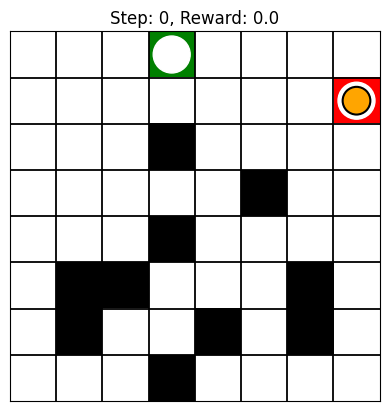

KeyboardInterrupt: 

In [ ]:
import gymnasium as gym
import gym_simplegrid
import numpy as np

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has a number from 0 to 63.
options = {
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='human')
obs, info = env.reset(seed=1, options=options)

# --------- NEW: MC config & storage ----------
GAMMA = 0.99
N_EPISODES = 100        # increase for smoother estimates
N_STATES = 64             # SimpleGrid-8x8 has 64 states
returns_sum = np.zeros(N_STATES, dtype=np.float64)
returns_cnt = np.zeros(N_STATES, dtype=np.int64)

# --------- Generate episodes + First-Visit MC ----------
for ep in range(N_EPISODES):
    # collect one episode under random policy
    states, rewards = [], []
    obs, info = env.reset(options=options)
    done = False

    # your original loop form, just until episode ends
    for t in range(100):
        if done:
            break
        action = env.action_space.sample()   # Random action
        next_obs, reward, done, _, info = env.step(action)

        states.append(obs)
        rewards.append(reward)
        obs = next_obs

    # compute returns backwards
    G = 0.0
    returns = np.zeros(len(states), dtype=np.float64)
    for t in reversed(range(len(states))):
        G = rewards[t] + GAMMA * G
        returns[t] = G

    # first-visit updates
    seen = set()
    for t, s in enumerate(states):
        if s in seen:
            continue
        seen.add(s)
        returns_sum[s] += returns[t]
        returns_cnt[s] += 1

# --------- Compute V(s) and print as grid ----------
V = np.zeros(N_STATES, dtype=np.float64)
mask = returns_cnt > 0
V[mask] = returns_sum[mask] / returns_cnt[mask]

grid_size = 8
V_grid = V.reshape(grid_size, grid_size)
np.set_printoptions(precision=3, suppress=True)
print("Estimated V(s) under random policy (first-visit MC):")
print(V_grid)

# env.close()
